# Mnist DataSet

![](pictures/Mnist.png)

## Introduction

The Mnist dataset contains 70,000 examples of handwritten letters. There are 60,000 Training sets for data and 10,000 for testing. The images have been normalized and centred in fixed size images.   

This is helpful for people who want to learn about using Machine learning algorithms, without the need for preprocessing and normalising all of the data, which can be a time consuming process when the data sets are large, ie 70,000 samples.

## Download the datasets

[Training set images](http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz)<br/>
[Training Set Labels](http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz)<br/>
[Test Set Images](http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz)<br/>
[Test Set Labels](http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz)<br/>

In [1]:

# adapted from: https://docs.python.org/3/library/gzip.html

import gzip
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    file_content = f.read()
    
import numpy as np
import cv2

import keras as kr
import sklearn.preprocessing as pre


C:\Users\Owner\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


After reading in the data we can print the first 4 bytes in order to ensure we are reading the right file.

In [2]:
#Each arguement has 4 bytes, this is where I got the 16 from for the For loop below
file_content[0:4]

b'\x00\x00\x08\x03'

## Displaying the images

In [3]:
import numpy as np


image = ~np.array(list(file_content[16:800])).reshape(28,28).astype(np.uint8)

After reading in the first image in the set we can display it using matplotlib

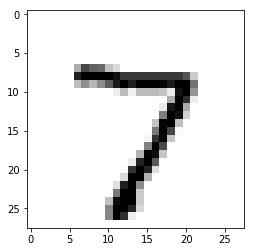

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(image, cmap='gray')

From the above image we can see that the images are arranged into 784 bytes. After reading in the first 16 bytes of the training set, all of the next bytes are part of the image so just need to loop through them after this and save them to csv files

In [18]:
with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    Traininglabels = f.read()

## Displaying the labels

In [19]:

int.from_bytes(Traininglabels[8:9], byteorder="big")

7

So from reading in the first image and the second image we can see that the images and labels match up, lets just try with the second image to make sure

In [7]:
image2 = ~np.array(list(file_content[800:1584])).reshape(28,28).astype(np.uint8)

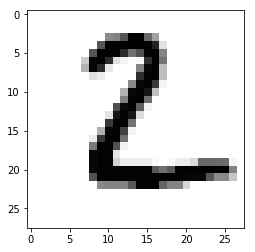

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(image2, cmap='gray')

In [20]:
int.from_bytes(Traininglabels[9:10], byteorder="big")

2

Great so this proves to us that the images and labels match up also, both Images are centred and so proves to us that after the opening 16 bytes the images are all contained inside 28 by 28 arrays or arrays of size 784

## Saving images to system

In [9]:
with gzip.open('data/train-images-idx3-ubyte.gz', 'rb') as f:
    train_img = f.read()
    
with gzip.open('data/train-labels-idx1-ubyte.gz', 'rb') as f:
    train_lbl = f.read()


#StartingBytes is where the images start and ImageSizeInBytes is the how far after the first 16 bytes 


StartingBytes = 16
AfterFirstImageSizeInBytes = 800
#Decided to use a for loop to read the images
for i in range(10):
    images = ~np.array(list(train_img[StartingBytes :AfterFirstImageSizeInBytes])).reshape(28,28).astype(np.uint8)
    StartingBytes += 784
    AfterFirstImageSizeInBytes += 784
    #cv2.imwrite('training' + str(i) + '.png', images )
    

## More efficent way to read in images

However as we learned in class this is not the most efficent way to read the images so instead we can use a numpy trick to download them by simply re-arranging  the images line above:

In [10]:
images2 = ~np.array(list(train_img[16 :])).reshape(60000,28,28).astype(np.uint8)
train_lbl =  np.array(list(train_lbl[ 8:])).astype(np.uint8)



So now that I have showed how to read in the files we can go on to discuss our neural network

## keras

As in the previous notebook(Iris_dataset) we are using keras here to create our neural network.


In [29]:
# Read in images for testing
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    test_img = f.read()

# Read in labels for testing
with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    test_lbl = f.read()

with gzip.open('data/train-images-idx3-ubyte.gz', 'rb') as f:
    train_img = f.read()

with gzip.open('data/train-labels-idx1-ubyte.gz', 'rb') as f:
    train_lbl = f.read()



In [30]:
 model = kr.models.Sequential()

model.add(kr.layers.Dense(units = 512, activation = 'linear', input_dim = 784))
model.add(kr.layers.Dense(units = 512, activation = 'relu'))
model.add(kr.layers.Dense(units=10, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [31]:
train_img = ~np.array(list(train_img[16:])).reshape(60000, 28, 28).astype(np.uint8) / 255.0
train_lbl =  np.array(list(train_lbl[ 8:])).astype(np.uint8)

In [32]:

encoder = pre.LabelBinarizer()
encoder.fit(train_lbl)
outputs = encoder.transform(train_lbl)

print(train_lbl[0], outputs[0])

5 [0 0 0 0 0 1 0 0 0 0]


In [33]:
inputs = train_img.reshape(60000, 784)

In [34]:
model.fit(inputs, outputs, epochs=2, batch_size=100)

Epoch 1/2
60000/60000 [==============================] - 55s 919us/step - loss: 0.5099 - acc: 0.84401s - loss: 0.5158
Epoch 2/2
60000/60000 [==============================] - 52s 863us/step - loss: 0.2217 - acc: 0.9315


## Testing our Neural Network

In [35]:
test_img = ~np.array(list(test_img[16:])).reshape(10000, 784).astype(np.uint8) / 255.0
test_lbl =  np.array(list(test_lbl[ 8:])).astype(np.uint8)

In [28]:

(encoder.inverse_transform(model.predict(test_img)) == test_lbl).sum()

9462

In [37]:
model.predict_classes(test_img[5:6])

array([1], dtype=int64)

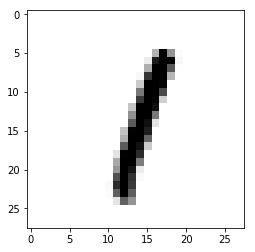

In [38]:
plt.imshow(test_img[5].reshape(28, 28), cmap='gray')

## Conclusion

Inside of this notebook I have examined the Mnist dataset, and showed how it can be successfully manipulated and saved to the system, I have also given a brief description of keras.